In [56]:
# Load data and modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import plotly.express as px

# The Data is part of the Kaggle Competition: https://www.kaggle.com/c/sf-crime/data
df_base = pd.read_csv('train.csv') 

print(df_base.describe())
df_base.head()

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


[Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'DRUG/NARCOTIC'),
 Text(5, 0, 'VEHICLE THEFT'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'MISSING PERSON'),
 Text(11, 0, 'ROBBERY'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES'),
 Text(15, 0, 'WEAPON LAWS'),
 Text(16, 0, 'PROSTITUTION'),
 Text(17, 0, 'TRESPASS'),
 Text(18, 0, 'STOLEN PROPERTY'),
 Text(19, 0, 'SEX OFFENSES FORCIBLE'),
 Text(20, 0, 'DISORDERLY CONDUCT'),
 Text(21, 0, 'DRUNKENNESS'),
 Text(22, 0, 'RECOVERED VEHICLE'),
 Text(23, 0, 'KIDNAPPING'),
 Text(24, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(25, 0, 'RUNAWAY'),
 Text(26, 0, 'LIQUOR LAWS'),
 Text(27, 0, 'ARSON'),
 Text(28, 0, 'LOITERING'),
 Text(29, 0, 'EMBEZZLEMENT'),
 Text(30, 0, 'SUICIDE'),
 Text(31, 0, 'FAMILY OFFENSES'),
 Text(32, 0, 'BAD CHECKS'),
 Text(33, 0, 'BR

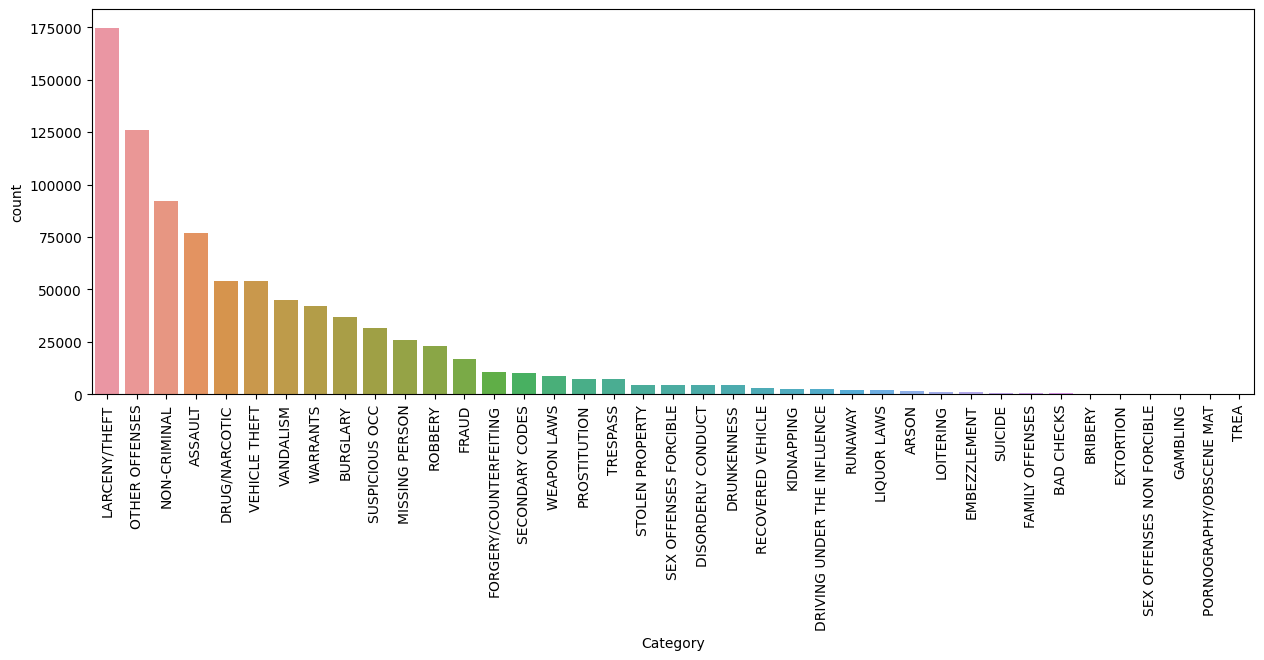

In [57]:
# Shows frequency of categories of crimes to help understand our data
plt.figure(figsize=(15,5))
ax = sns.countplot(x = df_base['Category'], orient='v', order = df_base['Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_38896\817858678.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0.0, 0, '0'),
 Text(20000.0, 0, '20000'),
 Text(40000.0, 0, '40000'),
 Text(60000.0, 0, '60000'),
 Text(80000.0, 0, '80000'),
 Text(100000.0, 0, '100000'),
 Text(120000.0, 0, '120000'),
 Text(140000.0, 0, '140000'),
 Text(160000.0, 0, '160000')]

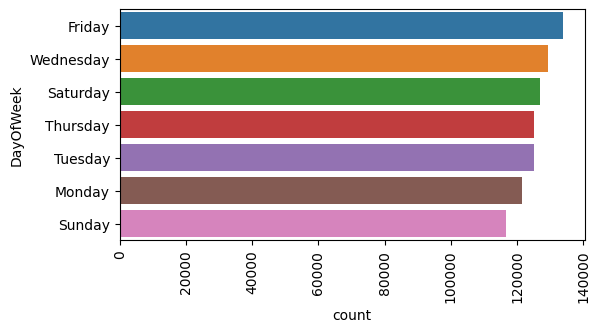

In [58]:
# Print crime counts per weekday to also help us understand our data
plt.figure(figsize=(6,3))
ax = sns.countplot(y = df_base['DayOfWeek'], orient='h', order = df_base['DayOfWeek'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<Figure size 1600x1000 with 0 Axes>

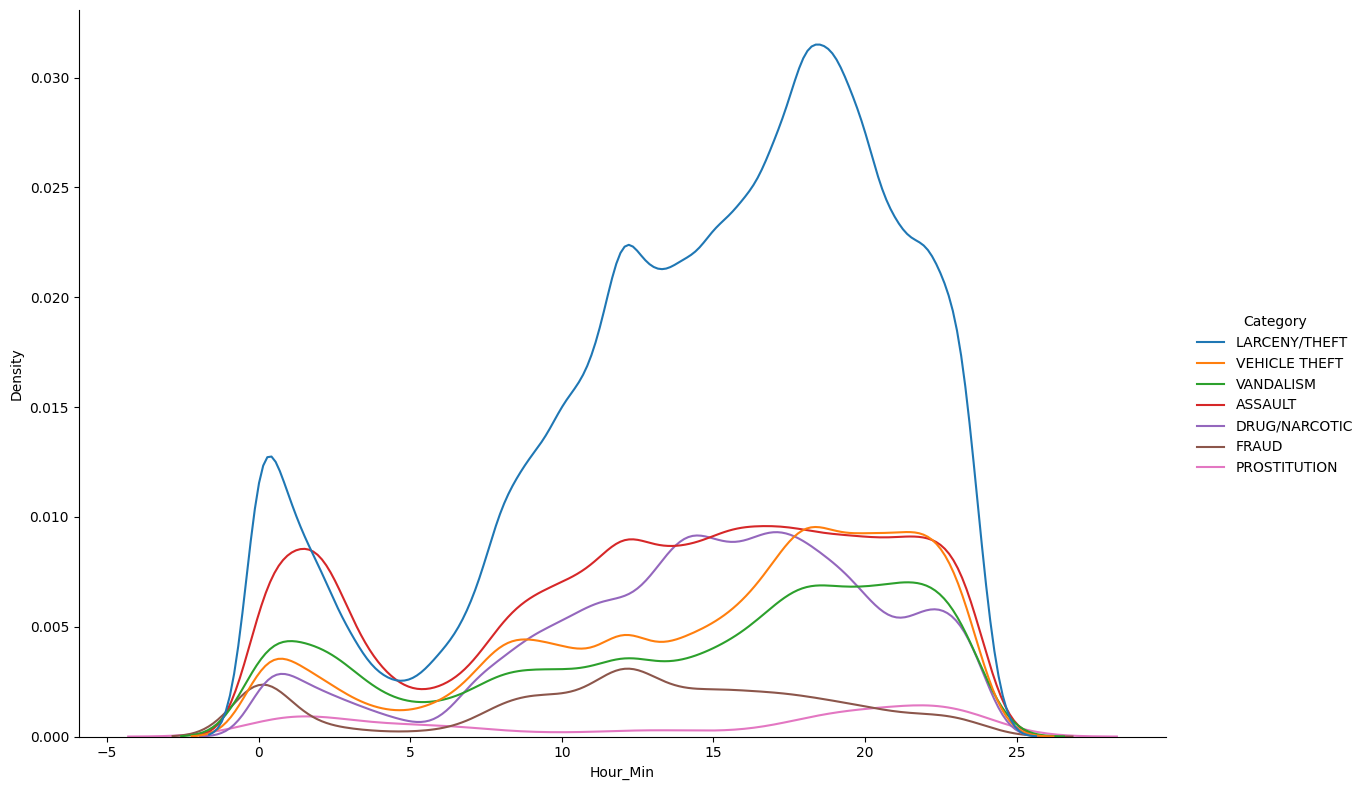

In [59]:
# Convert the time to minutes
df_base['Hour_Min'] = pd.to_datetime(df_base['Dates']).dt.hour  + pd.to_datetime(df_base['Dates']).dt.minute / 60

# Print crime counts per time and category to get overview of when the crimes were comitted
df_base_filtered = df_base[df_base['Category'].isin([
    'PROSTITUTION', 
    'VEHICLE THEFT', 
    'DRUG/NARCOTIC', 
    'WARRENTS', 
    'BURGLERY', 
    'FRAUD', 
    'ASSAULT',
    'LARCENY/THEFT',
    'VANDALISM'])]

plt.figure(figsize=(16,10))
ax = sns.displot(x = 'Hour_Min', hue="Category", data = df_base_filtered, kind="kde", height=8, aspect=1.5)

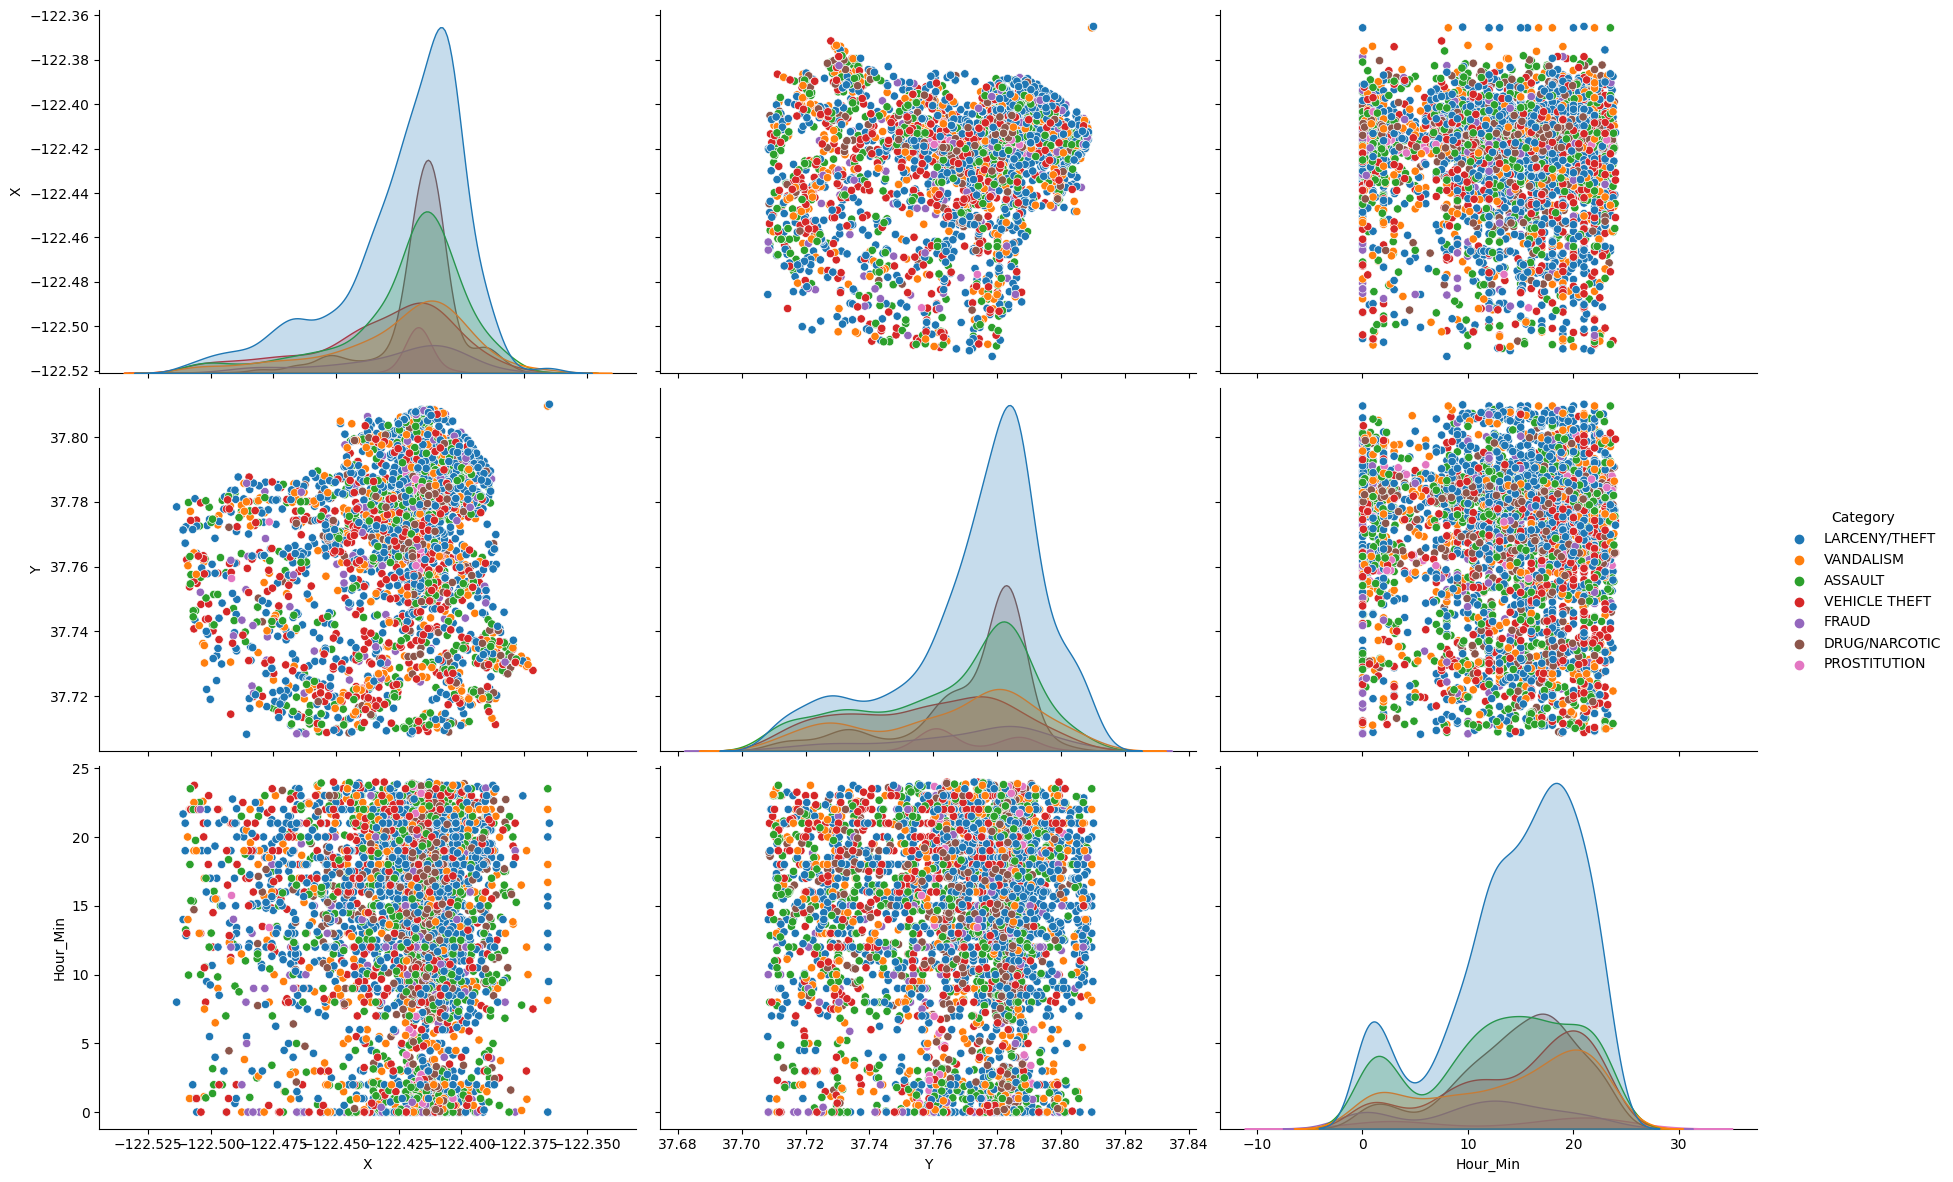

In [60]:
# Plot 1/100th of the data to reduce computation time and overview of other additional features
sns.pairplot(data = df_base_filtered[0::100], height=4, aspect=1.5, hue='Category')

In [61]:
# Extracting 10 sample values of crime addresses.. this helps us understand that a lot of crimes happened at intersections
for i in df_base['Address'][0:10]:
    print(i)

OAK ST / LAGUNA ST
OAK ST / LAGUNA ST
VANNESS AV / GREENWICH ST
1500 Block of LOMBARD ST
100 Block of BRODERICK ST
0 Block of TEDDY AV
AVALON AV / PERU AV
KIRKWOOD AV / DONAHUE ST
600 Block of 47TH AV
JEFFERSON ST / LEAVENWORTH ST


In [62]:
# In this section we create 3 features based on the information we learned in the above sections. Date & Time, Address and Latitude & Longitude. These features are comprised of different parts of our dataset to give a clear picture of when and where a crime occured
# Processing Function for Features
def cart2polar(x, y):
    dist = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return dist, phi

def preprocessFeatures(dfx):
    
    # Time Feature Engineering
    df = pd.get_dummies(dfx[['DayOfWeek' , 'PdDistrict']])
    df['Hour_Min'] = pd.to_datetime(dfx['Dates']).dt.hour + pd.to_datetime(dfx['Dates']).dt.minute / 60
    # We add a feature that contains the expontential time
    df['Hour_Min_Exp'] = np.exp(df['Hour_Min'])
    
    df['Day'] = pd.to_datetime(dfx['Dates']).dt.day
    df['Month'] = pd.to_datetime(dfx['Dates']).dt.month
    df['Year'] = pd.to_datetime(dfx['Dates']).dt.year

    month_one_hot_encoded = pd.get_dummies(pd.to_datetime(dfx['Dates']).dt.month, prefix='Month')
    df = pd.concat([df, month_one_hot_encoded], axis=1, join="inner")
    
    # Convert Carthesian Coordinates to Polar Coordinates
    df[['X', 'Y']] = dfx[['X', 'Y']] # we maintain the original coordindates as additional features
    df['dist'], df['phi'] = cart2polar(dfx['X'], dfx['Y'])
  
    # Extracting Street Types
    df['Is_ST'] = dfx['Address'].str.contains(" ST", case=True)
    df['Is_AV'] = dfx['Address'].str.contains(" AV", case=True)
    df['Is_WY'] = dfx['Address'].str.contains(" WY", case=True)
    df['Is_TR'] = dfx['Address'].str.contains(" TR", case=True)
    df['Is_DR'] = dfx['Address'].str.contains(" DR", case=True)
    df['Is_Block'] = dfx['Address'].str.contains(" Block", case=True)
    df['Is_crossing'] = dfx['Address'].str.contains(" / ", case=True)
    
    return df

# Processing Function for Labels
def encodeLabels(dfx):
    df = pd.DataFrame (columns = [])
    factor = pd.factorize(dfx['Category'])
    return factor

# Remove Outliers by Longitude
df_cleaned = df_base[df_base['Y']<70]

# Encode Labels as Integer
factor = encodeLabels(df_cleaned)
y_df = factor[0]
labels = list(factor[1])
# for val, i in enumerate(labels):
#     print(val, i)

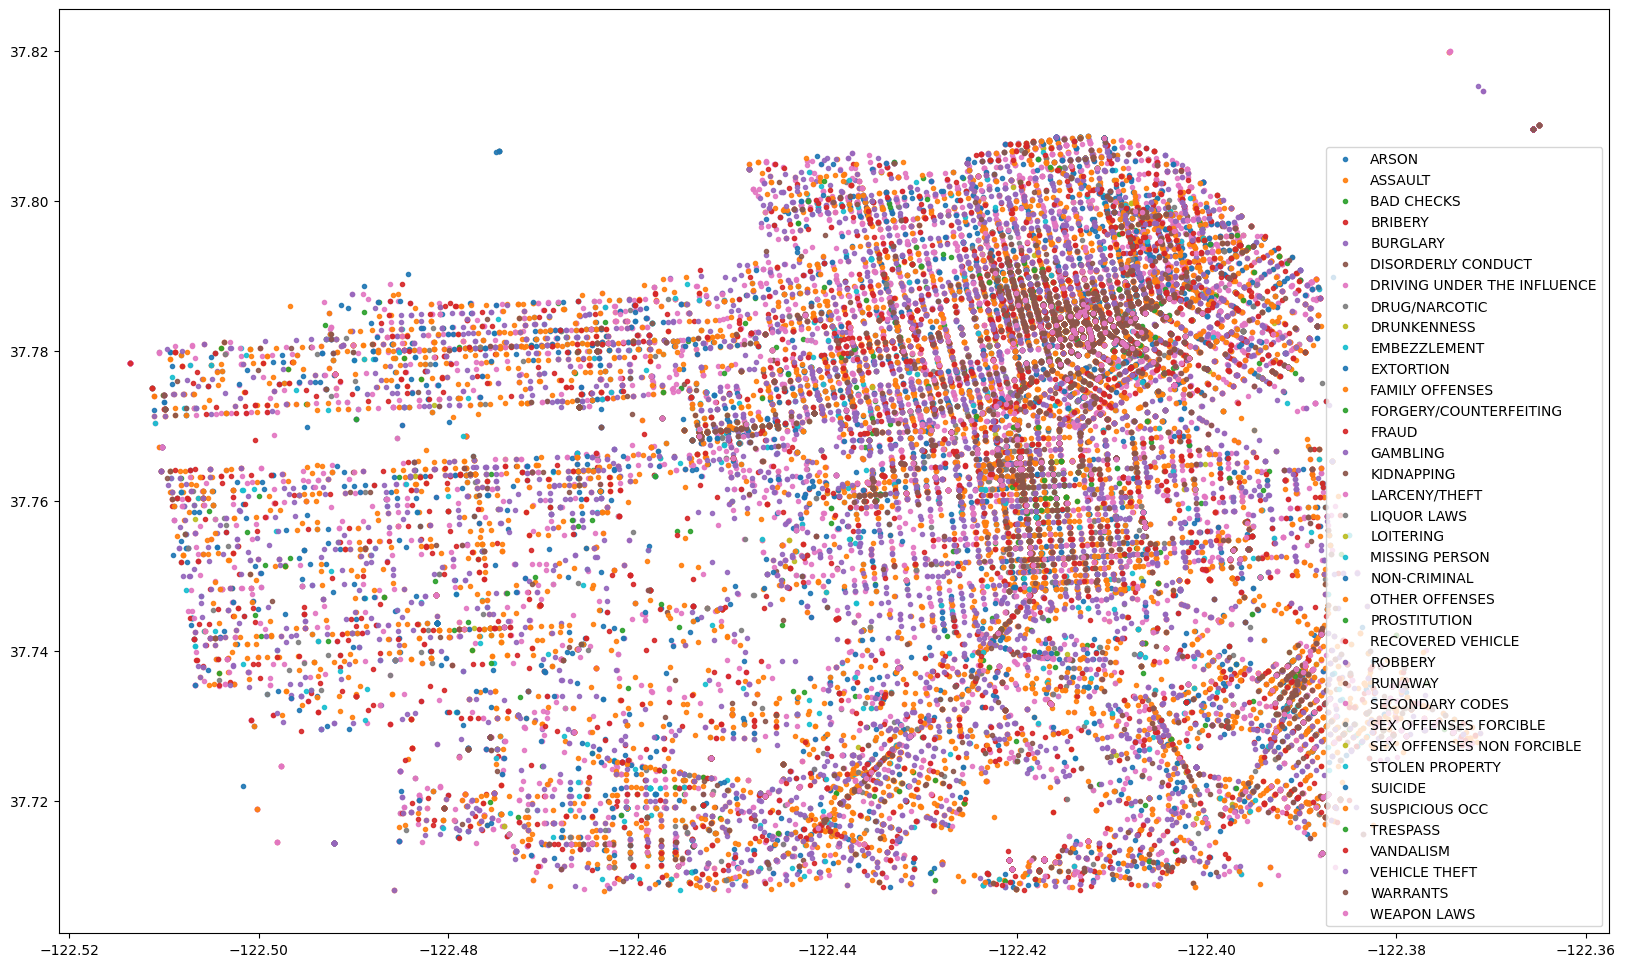

In [63]:
# Scatter plot of crimes across San Fransisco, which helps us see if certain crimes happen a lot in certain areas
# Plot Criminal Activities by Lat and Long
df_filtered = df_cleaned.sample(frac=0.05)  
#df_filtered = df_cleaned[df_cleaned['Category'].isin(['PROSTITUTION', 'VEHICLE THEFT', 'FRAUD'])].sample(frac=0.05) # to filter 

groups = df_filtered.groupby('Category')

fig, ax = plt.subplots(sharex=False, figsize=(20, 12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['X'], group['Y'], marker='.', linestyle='', label=name, alpha=0.9)
ax.legend()
plt.show()

In [64]:
# 4.2 Create a Crime Map of San Francisco using Plotly
# Limit the data to a fraction and selected categories
df_filtered = df_cleaned.sample(frac=0.01) 
fig = px.scatter_mapbox(df_filtered, lat="Y", lon="X", hover_name="Category", color='Category', hover_data=["Y", "X"], zoom=12, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed